In [93]:
import pickle
import glob
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

modelDir = 'models'
environment = 'CartPole-v0' 

files = glob.glob(modelDir + "/" + environment + "*.h5")
episode = -1

# Get last file and episode
for f in files:
    ep = int(f.split("_",1)[1].replace(".h5", ""))
    if ep > episode:
        file = f
        episode = ep

# Read variables
with open( file.replace(".h5","") + '.pkl', 'rb') as f:
    episode, epsilon, steps, uid, reward, memory = pickle.load(f)

In [94]:
x = []
y = []

for ep in range(1, episode+1):
    x.append(ep)
    
    total_reward = 0
    
    for i in reward:
        if i[0] == ep:
            total_reward += i[1]
            
    y.append(total_reward)

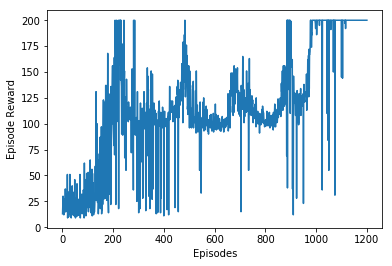

In [95]:
plt.plot(x,y)
plt.xlabel('Episodes')
plt.ylabel('Episode Reward')

plt.savefig('Report/images/rewardOverEpisodes.jpeg')